In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

In [3]:
from tqdm import tqdm


def get_data(filename):
    # You will need to write code that will read the file passed
    # into this function. The first line contains the column headers
    # so you should ignore it
    # Each successive line contians 785 comma separated values between 0 and 255
    # The first value is the label
    # The rest are the pixel values for that picture
    # The function will return 2 np.array types. One with all the labels
    # One with all the images
    #
    # Tips: 
    # If you read a full line (as 'row') then row[0] has the label
    # and row[1:785] has the 784 pixel values
    # Take a look at np.array_split to turn the 784 pixels into 28x28
    # You are reading in strings, but need the values to be floats
    # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        # Your code starts here
        all_lines = training_file.readlines()[1:] #remove header
        length = len(all_lines)
        labels = np.zeros(length)
        images = np.zeros((length, 28, 28))
        for idx, line in tqdm(enumerate(all_lines), desc=filename, total=length):
            line = line.strip().split(',')
            if not line:
                continue
            #add the label
            labels[idx] = int(line[0])
            #add the image
            image = np.asarray(line[1:], dtype=np.float32)
            image = np.array_split(image, 28)
            images[idx, :, :] = image
        # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print()
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

sign_mnist_test.csv: 100%|██████████| 7172/7172 [00:01<00:00, 4819.10it/s]


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
#get number of labels in this dataset
np.unique(training_labels).shape

(24,)

In [5]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3) # Your Code Here
testing_images = np.expand_dims(testing_images, axis=3) # Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
                    # Your Code Here
                    rescale = 1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                    )

validation_datagen = ImageDataGenerator(
                    # Your Code Here
                    rescale = 1./255
                    )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
                                    # Your Code Here
                                    # first convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # second convolution
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(24, activation='softmax')
                                    ])

# Compile Model. 
#difference between sparse_categorical_crossentropy and categorical_crossentropy is the latter expects one-hot encoding of the label
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
)

# Train the Model
train_generator = train_datagen.flow(training_images,
                                     training_labels)
validation_generator = validation_datagen.flow(testing_images, testing_labels)

history = model.fit_generator(train_generator,
                              validation_data = validation_generator,
                              epochs=30,
                              verbose = 1)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/30
858/858 [==============================] - 12s 14ms/step - loss: nan - acc: 0.0410 - val_loss: nan - val_acc: 0.0462
Epoch 2/30
858/858 [==============================] - 11s 12ms/step - loss: nan - acc: 0.0410 - val_loss: nan - val_acc: 0.0462
Epoch 3/30
858/858 [==============================] - 10s 12ms/step - loss: nan - acc: 0.0410 - val_loss: nan - val_acc: 0.0462
Epoch 4/30
858/858 [==============================] - 10s 12ms/step - loss: nan - acc: 0.0410 - val_loss: nan - val_acc: 0.0462
Epoch 5/30
858/858 [==============================] - 10s 12ms/step - loss: nan - acc: 0.0410 - val_loss: nan - val_acc: 0.0462
Epoch 6/30
858/858 [==============================] - 10s 12ms/step - loss: nan - acc: 0.0410 - val_loss: nan - val_acc: 0.0462
Epoch 7/30
858/858 [=========================

[6.92426086682151, 0.56609035]

In [7]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

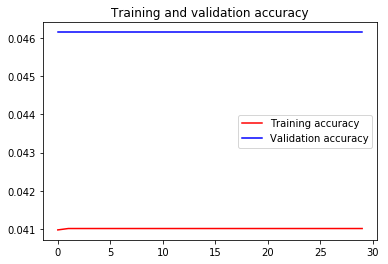

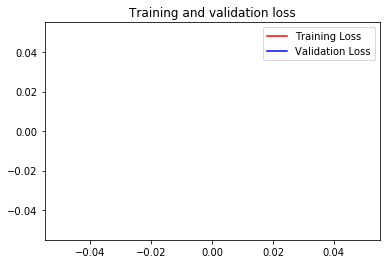

In [8]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc'] # Your Code Here
val_acc = history.history['val_acc'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()